In [1]:
# Cuanto gasta una persona su salario si lo sabe usar o malgastar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
np.random.seed(42)
ingresos = np.random.normal(50, 15, 200)
puntuacion = np.random.randint(1, 100, 200)
X = np.vstack((ingresos, puntuacion)).T
print("Primeros n clientes ingresados")
for i in range(200):
    print(f"Cliente {i+1}: Ingresos = {ingresos[i]:.2f}, Puntuación = {puntuacion[i]}")

Primeros n clientes ingresados
Cliente 1: Ingresos = 57.45, Puntuación = 2
Cliente 2: Ingresos = 47.93, Puntuación = 90
Cliente 3: Ingresos = 59.72, Puntuación = 17
Cliente 4: Ingresos = 72.85, Puntuación = 33
Cliente 5: Ingresos = 46.49, Puntuación = 9
Cliente 6: Ingresos = 46.49, Puntuación = 43
Cliente 7: Ingresos = 73.69, Puntuación = 48
Cliente 8: Ingresos = 61.51, Puntuación = 39
Cliente 9: Ingresos = 42.96, Puntuación = 93
Cliente 10: Ingresos = 58.14, Puntuación = 42
Cliente 11: Ingresos = 43.05, Puntuación = 26
Cliente 12: Ingresos = 43.01, Puntuación = 99
Cliente 13: Ingresos = 53.63, Puntuación = 50
Cliente 14: Ingresos = 21.30, Puntuación = 25
Cliente 15: Ingresos = 24.13, Puntuación = 24
Cliente 16: Ingresos = 41.57, Puntuación = 13
Cliente 17: Ingresos = 34.81, Puntuación = 60
Cliente 18: Ingresos = 54.71, Puntuación = 7
Cliente 19: Ingresos = 36.38, Puntuación = 57
Cliente 20: Ingresos = 28.82, Puntuación = 36
Cliente 21: Ingresos = 71.98, Puntuación = 45
Cliente 22: Ing

In [3]:
#Calculamos la media tanto de los ingresos como la puntuacion de gasto
media_ingresos = np.mean(ingresos)
media_puntuacion = np.mean(puntuacion)

print(f"Media de ingresos anuales: {media_ingresos:.2f} en dolares")
print(f"Media de puntuación de gasto: {media_puntuacion:.2f}")

Media de ingresos anuales: 49.39 en dolares
Media de puntuación de gasto: 49.81


In [4]:
inertia = []
silhouettes = []

for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouettes.append(score)

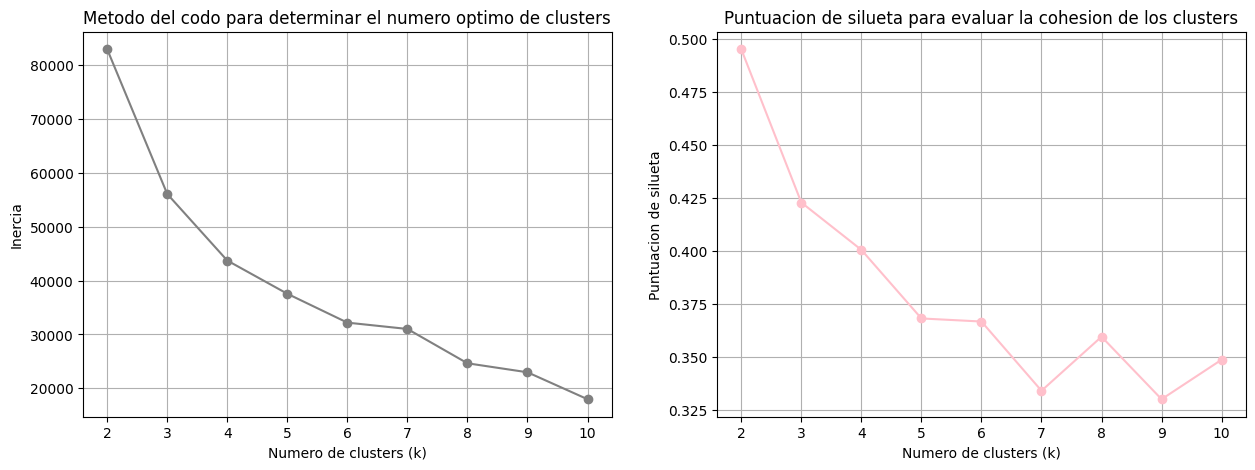

In [5]:
#Visualizacion de los resultados del metodo del codo y puntuacion de silueta para determinar
#Visualizamos los resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o', color='grey')
plt.title('Metodo del codo para determinar el numero optimo de clusters')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)

#grafico de puntuacion de silueta
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouettes, marker='o', color='pink')
plt.title('Puntuacion de silueta para evaluar la cohesion de los clusters')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Puntuacion de silueta')
plt.grid(True)

plt.show()
optimal_k = 5

In [6]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

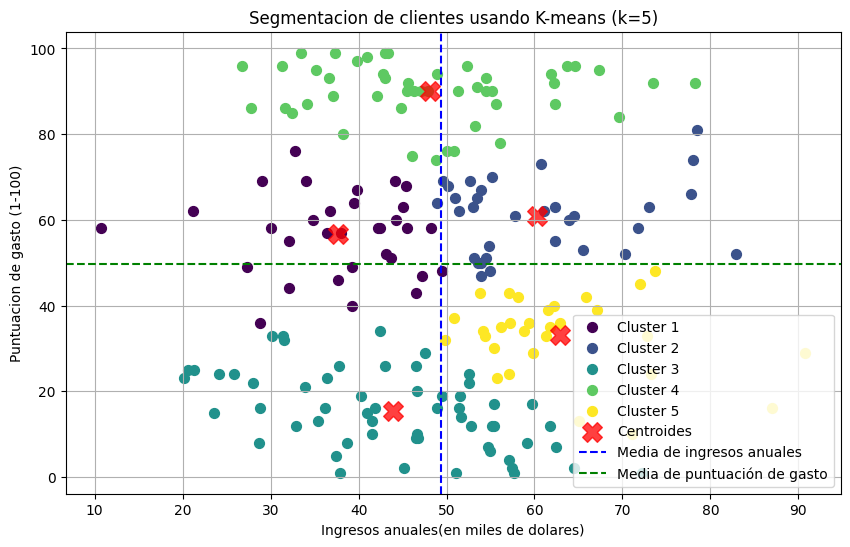

In [7]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, optimal_k)) #creamos una paleta de colores con viridis
#graficamos cada cluster con un color diferente
for i, color in enumerate(colors):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i,1], s=50, c=[color], label=f'Cluster {i+1}')
#Marcar los centroides de los clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroides')

#Agregar las medias globales al grafico para compararlas con los clusters
plt.axvline(x=media_ingresos, color='blue', linestyle='--', label='Media de ingresos anuales')
plt.axhline(y=media_puntuacion, color='green', linestyle='--', label='Media de puntuación de gasto')
#Etiquetas y leyendas para emjorar la visualizacion
plt.title('Segmentacion de clientes usando K-means (k=5)')
plt.xlabel('Ingresos anuales(en miles de dolares)')
plt.ylabel('Puntuacion de gasto (1-100)')
plt.legend()
plt.grid(True)
plt.show()